In [2]:
#q1a
from csv import reader

In [3]:
with open("rjParagraphs-1652733359.csv") as csv_file:
    csv_reader = reader(csv_file, delimiter=',')
    lot = [tuple(row) for idx, row in enumerate(csv_reader) if not idx == 0]

In [4]:
#q1b
def char_counter(lyst):
    char_dict = {}
    for row in lyst:
        name, line = row
        if not name in char_dict.keys():
            char_dict[name] = 1
        else:
            char_dict[name] += 1
    return char_dict

In [5]:
#func call
shake_dict = char_counter(lot)
#displaying dict
print(shake_dict)

{'Benvolio': 64, 'Tybalt': 17, 'Romeo': 163, 'Juliet': 118}


In [6]:
#q1c
def para_counter(lyst):
    para_dict = {}
    for row in lyst:
        name,line = row
        para_dict[line] = len(line)
        
    return para_dict

In [7]:
#func call
shake_para=para_counter(lot)
#sorting
shake_para = sorted(shake_para.items(), key = lambda x: x[1], reverse = True)
#getting top 3
for i in range(0,3):
    print(shake_para[i][0] + "\n")

In faith, I will. Let me peruse this face.
Mercutio's kinsman, noble County Paris!
What said my man, when my betossed soul
Did not attend him as we rode? I think
He told me Paris should have married Juliet:
Said he not so? or did I dream it so?
Or am I mad, hearing him talk of Juliet,
To think it was so? O, give me thy hand,
One writ with me in sour misfortune's book!
I'll bury thee in a triumphant grave;
A grave? O no! a lantern, slaughter'd youth,
For here lies Juliet, and her beauty makes
This vault a feasting presence full of light.
Death, lie thou there, by a dead man interr'd.
[Laying PARIS in the tomb]
How oft when men are at the point of death
Have they been merry! which their keepers call
A lightning before death: O, how may I
Call this a lightning? O my love! my wife!
Death, that hath suck'd the honey of thy breath,
Hath had no power yet upon thy beauty:
Thou art not conquer'd; beauty's ensign yet
Is crimson in thy lips and in thy cheeks,
And death's pale flag is not advanced

In [8]:
#q1d
def word_freq(lyst):
    word_dict = {}
    for row in lyst:
        name, line = row
        w_list =[token.strip("[\,?.];!").lower() for token in line.split()]
        for token in w_list:
            if not token in word_dict.keys():
                word_dict[token] = 1
            else:
                word_dict[token] +=1 
    return word_dict

In [9]:
#func call
wf = word_freq(lot)
#sort by value
wf_sort= sorted(wf.items(), key = lambda x: x[1], reverse = True)
#dropping top 150 results
wf_sort = wf_sort[149:]
#printing top 15
print([word[0] for word in wf_sort[0:14]])

['villain', 'therefore', 'lord', 'friar', 'news', 'slain', 'hate', 'else', 'nor', 'cannot', 'world', 'sin', 'breath', 'comes']


In [10]:
#Q2
#imports for bonus question
import matplotlib.pyplot as plt
import numpy as np
import random as rd
%matplotlib inline


class iLine():
    #init method
    def __init__(self, no_of_coefs):
        self.coefs = no_of_coefs
    #identity method - try to convert to __repr__ from subclasses
    def who_am_i(self):
        if self.coefs == 2:
            return 'Straight Line'
        elif self.coefs == 3:
            return 'Curved Line'
    
    #returns equation with coefficients from the subclass
    def lineEquation(self):
        return self.equation()
    
    def linePlot(self):
        #plt method
        
        return plt.plot(self.user_x,self.getY())
    
    
    #static method
    @staticmethod
    def gen_coefs():  
        coef = rd.randrange(-10, 11)
        return coef
    

In [11]:
class iStraight(iLine):
    #figure out how to get rid of no_of_coefs
    def __init__(self,lower_x,upper_x):
        super().__init__(no_of_coefs = 2)
        #random coefs
        self.coef_m = super().gen_coefs()
        self.coef_c = super().gen_coefs()
        #user-define range for x array
        self.user_x = np.array(range(lower_x,upper_x))
    
    #re-write to plug the coefs into output
    def equation(self):
        return "The equation of the Straight Line: Y = {}*X + {}".format(self.coef_m,self.coef_c)
        
    def getY(self):
        y = self.coef_m*self.user_x + self.coef_c
        return y
        

In [12]:
class iCurved(iLine):
    #coef generator
    
    def __init__(self,lower_x,upper_x):
        super().__init__(no_of_coefs = 3)
        #random coefs
        self.coef_a = super().gen_coefs()
        self.coef_b = super().gen_coefs()
        self.coef_c = super().gen_coefs()
        #user-defined range for x array
        self.user_x = np.array(range(lower_x,upper_x))
        
    def equation(self):
        return "The equation of the Curved Line: Y = {}*X^2 + {}X + {}".format(self.coef_a,self.coef_b,self.coef_c)
      
    def getY(self):
        #this needs to return a range based on x range
        y = self.coef_a*self.user_x**2 + self.coef_b*self.user_x+self.coef_c
        return y
    
    def findRoots(self):
        coef_list = [self.coef_a,self.coef_b,self.coef_c]
        np_roots = np.roots(coef_list)
        real_roots=[r.real for r in np_roots]
        return "The roots are x1:{0} and x2:{1}".format(real_roots[0], real_roots[1])
        

In [13]:
def plot_tester(from_x,to_x):
    s_lines = 3
    c_lines = 3
    #for all s_lines, building logic to spit out plot and title
    while s_lines:
        sline = iStraight(from_x,to_x)
        plt.title(f' {sline.who_am_i()} \n Number of coefficients: 2\n {sline.lineEquation()}',loc='left')
        sline.linePlot()
        s_lines-=1
        plt.show()
        
    while c_lines:
        cline = iCurved(from_x,to_x)
        plt.title(f' {cline.who_am_i()} \n Number of coefficients: 3\n {cline.lineEquation()}\n {cline.findRoots()}',loc='left')
        cline.linePlot()
        c_lines-=1
        plt.show()

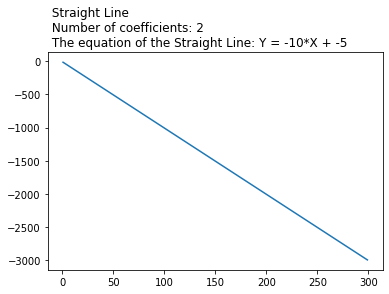

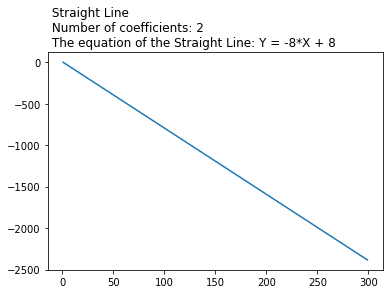

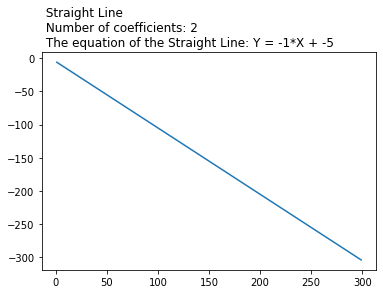

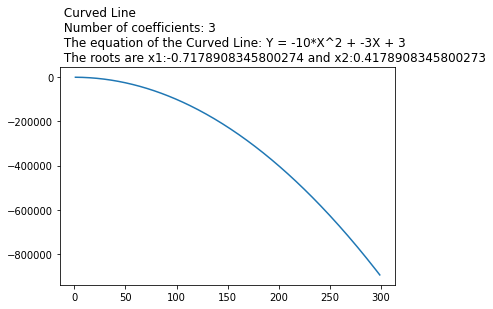

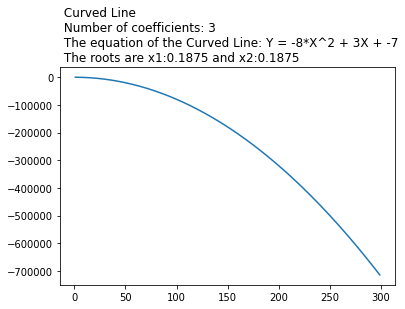

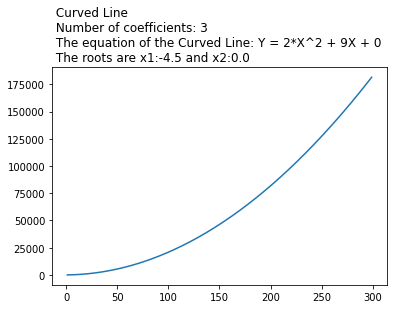

In [15]:
plot_tester(1,300)